In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import category_encoders as ce
import xgboost as xgb
from xgboost import XGBClassifier
from datetime import datetime
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)


# TRAIN

In [2]:
train = pd.read_csv(r'D:\Data Science\Projects\Housing Project\Data\train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [3]:
# train = pd.read_csv('/Volumes/Samsung USB/Data Science/Projects/Housing Project/Data/train.csv')
# train

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Types

**ORDINAL
_________
LotShape
LandContour
Utilities
LandSlope
OverallQual
OverallCond
YearBuilt*
YearRemodAdd
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
CentralAir
KitchenQual
Functional
FireplaceQu
GarageYrBlt*
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscVal*

**NOMINAL
_________
MSSubClass
MSZoning
Street
Alley
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
Heating
Electrical
GarageType
PavedDrive
MiscFeature
SaleType
SaleCondition

**CONTINUOUS
_________
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MoSold
YrSold

Null Features

In [5]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [6]:
def fraction_missing(column):
    total_rows = len(column)
    missing_count = column.isnull().sum()
    return missing_count/total_rows

missing_fraction = train.apply(fraction_missing)
missing_fraction

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.597260
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [7]:
high_missing_features_train = missing_fraction[missing_fraction > 0.5]
high_missing_features_train = high_missing_features_train.sort_values(ascending=False)
high_missing_features_train

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
dtype: float64

In [8]:
train.select_dtypes(include='object').isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
KitchenQual         0
CentralAir          0
Functional          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [9]:
train.select_dtypes(include=('int', 'float')).isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

## Data Cleaning

### Duplicates

In [10]:
train['Id'].value_counts()

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64

## Outliers

### LotArea

<Axes: >

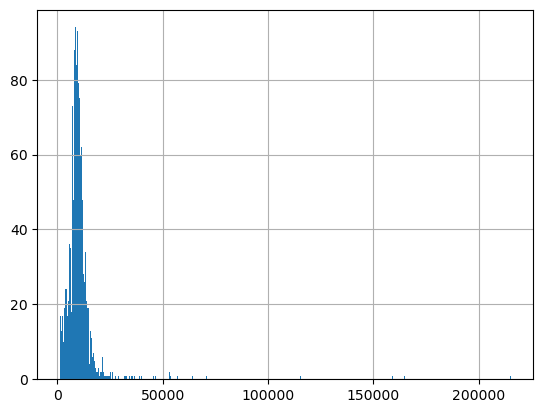

In [11]:
train['LotArea'].hist(bins=500)

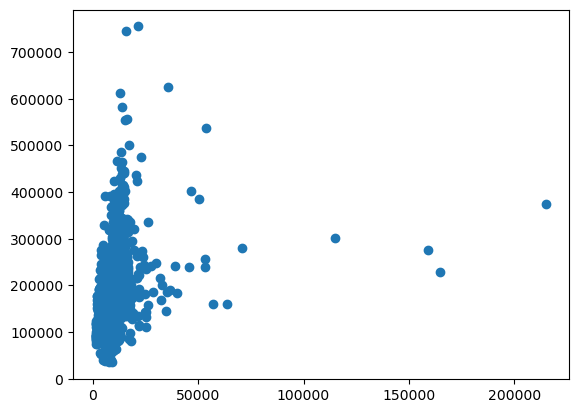

In [12]:
plt.scatter(train['LotArea'], train['SalePrice'])

In [13]:
train = train.drop(train[train['LotArea']> 150000].index).reset_index(drop=True)

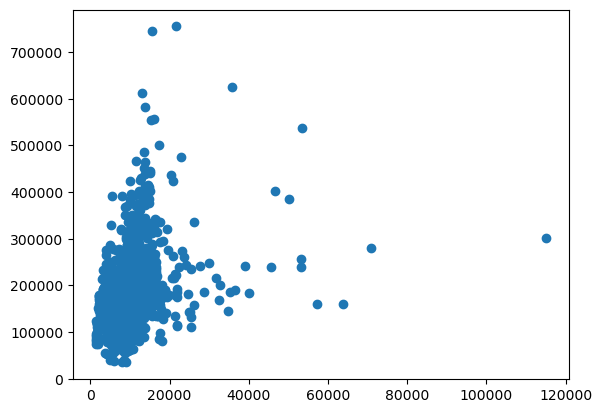

In [14]:
plt.scatter(train['LotArea'], train['SalePrice'])

## Null Features

### Categorical Features

#### PoolQC

In [15]:
train['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [16]:
train['PoolQC'].isnull().sum()

1450

In [17]:
train[train['PoolQC'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1453,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1454,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1455,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [18]:
train['PoolQC'] = np.where((train['PoolQC'].isnull() & (train['PoolArea']==0)), 'NA', train['PoolQC']) #if no pool area means no pool
train['PoolQC'].isnull().sum()

0

#### MiscFeature

In [19]:
train['MiscFeature'].value_counts()

MiscFeature
Shed    47
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [20]:
train['MiscFeature'].isnull().sum()

1405

In [21]:
train['MiscFeature'] = np.where((train['MiscFeature'].isnull() & (train['GarageType']=='2Types')), 'Gar2', train['MiscFeature']) #if 2types of garage then its 2nd garage
train['MiscFeature'] = np.where(train['MiscFeature'].isnull(), 'NA', train['MiscFeature'])
train['MiscFeature'].isnull().sum()

0

#### Alley

In [22]:
train['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [23]:
train['Alley'].isnull().sum()

1366

In [24]:
train['Alley'] = np.where(train['Alley'].isnull(), 'NA', train['Alley']) #we can assume the null values as no alleys, because it is the only missing value and is the biggest count
train['Alley'].isnull().sum()

0

#### Fence

In [25]:
train['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [26]:
train['Fence'].isnull().sum()

1176

In [27]:
train['Fence'] = np.where(train['Fence'].isnull(), 'NA', train['Fence']) #largest value that's null and missing category 
train['Fence'].isnull().sum()

0

#### MasVnrType

In [28]:
train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      14
Name: count, dtype: int64

In [29]:
train['MasVnrType'].isnull().sum()

870

In [30]:
train['MasVnrType'] = np.where(train['MasVnrType'].isnull(), 'NA', train['MasVnrType']) #it is missing None and is the largest value count
train['MasVnrType'].isnull().sum()

0

#### FireplaceQu

In [31]:
train['FireplaceQu'].value_counts()

FireplaceQu
Gd    378
TA    312
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [32]:
train['FireplaceQu'].isnull().sum()

690

In [33]:
train[train['FireplaceQu'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,11,20,RL,70.0,11200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,NA,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,NA,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NA,NA,NA,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NA,GdPrv,NA,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1453,180,RM,35.0,3675,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NA,NA,NA,0,5,2006,WD,Normal,145000
1450,1454,20,RL,90.0,17217,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NA,NA,NA,0,7,2006,WD,Abnorml,84500
1451,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NA,NA,NA,0,10,2009,WD,Normal,185000
1455,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,

In [34]:
train['FireplaceQu'] = np.where((train['FireplaceQu'].isnull()) & (train['Fireplaces']==0), 'NA', train['FireplaceQu'])
train['FireplaceQu'].isnull().sum()

0

#### GarageType

In [35]:
train['GarageType'].value_counts()

GarageType
Attchd     867
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [36]:
train['GarageType'].isnull().sum()

81

In [37]:
train['GarageType'] = np.where((train['GarageType'].isnull() & (train['GarageCars']== 0)), 'NA', train['GarageType']) #if 0 cars then no garage
train['GarageType'].isnull().sum()

0

#### GarageCond

In [38]:
train['GarageCond'].value_counts()

GarageCond
TA    1323
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [39]:
train['GarageCond'].isnull().sum()

81

In [40]:
train['GarageCond'] = np.where((train['GarageCond'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageCond']) #if 0 cars then no garage
train['GarageCond'].isnull().sum()

0

#### GarageQual

In [41]:
train['GarageQual'].value_counts()

GarageQual
TA    1308
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [42]:
train['GarageQual'].isnull().sum()

81

In [43]:
train['GarageQual'] = np.where((train['GarageQual'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageQual']) #if 0 cars then no garage
train['GarageQual'].isnull().sum()

0

#### GarageFinish

In [44]:
train['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    421
Fin    350
Name: count, dtype: int64

In [45]:
train['GarageFinish'].isnull().sum()

81

In [46]:
train['GarageFinish'] = np.where((train['GarageFinish'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageFinish']) #if 0 cars then no garage
train['GarageFinish'].isnull().sum()

0

#### BsmtFinType2

In [47]:
train['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1255
Rec      53
LwQ      46
BLQ      32
ALQ      19
GLQ      14
Name: count, dtype: int64

In [48]:
train['BsmtFinType2'].isnull().sum()

38

In [49]:
train[train['BsmtFinType2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NA,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NA,NA,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NA,NA,NaN,NA,0,0,NA,NA,N,0,0,0,0,0,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NA,NA,NA,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NA,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NA,MnPrv,NA,0,6,2007,WD,Normal,120000
258,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,97000
330,333,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,10,2009,WD,Normal,284000
339,343,90,RL,NaN,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NA,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,5,2006,WD,Normal,87500
359,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NA,NA,NA

In [50]:
train['BsmtFinType2'] = np.where((train['BsmtFinType2'].isnull() & train['BsmtUnfSF'] > 0), 'Unf', train['BsmtFinType2'])
train['BsmtFinType2'].isnull().sum()

37

In [51]:
train['BsmtFinType2'] = np.where(train['BsmtFinType2'].isnull(), 'NA', train['BsmtFinType2'])
train['BsmtFinType2'].isnull().sum()

0

#### BsmtExposure

In [52]:
train['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    131
Mn    114
Name: count, dtype: int64

In [53]:
train['BsmtExposure'].isnull().sum()

38

In [54]:
train[train['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NA,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NA,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NA,NA,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NA,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NA,NA,NaN,NA,0,0,NA,NA,N,0,0,0,0,0,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NA,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NA,NA,NA,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NA,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NA,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NA,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NA,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NA,MnPrv,NA,0,6,2007,WD,Normal,120000
258,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NA,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,97000
339,343,90,RL,NaN,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NA,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NA,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,5,2006,WD,Normal,87500
359,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NA,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NA,NA,NA,0,7,2009,ConLD,Normal,198500
368,372,50,RL,80.0,17120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,NA,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NA,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,7,2008,WD,Norm

In [55]:
train['BsmtExposure'] = np.where((train['BsmtExposure'].isnull()) & (train['TotalBsmtSF']==0), 'NA', train['BsmtExposure'])

In [56]:
train[train['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
945,949,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,Normal,192500


In [57]:
train['BsmtExposure'] = np.where(train['BsmtExposure'].isnull(), train['BsmtExposure'].mode(), train['BsmtExposure'])
train['BsmtExposure'].isnull().sum()

0

#### BsmtFinType1

In [58]:
train['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    218
BLQ    148
Rec    132
LwQ     74
Name: count, dtype: int64

In [59]:
train['BsmtFinType1'].isnull().sum()

37

In [60]:
train['BsmtFinType1'] = np.where(train['BsmtFinType1'].isnull(), 'NA', train['BsmtFinType1']) #these values have TotalBsmtSF as 0 so there is no basement
train['BsmtFinType1'].isnull().sum()

0

#### BsmtQual

In [61]:
train['BsmtQual'].value_counts()

BsmtQual
TA    648
Gd    616
Ex    121
Fa     35
Name: count, dtype: int64

In [62]:
train['BsmtQual'].isnull().sum()

37

In [63]:
train['BsmtFinSF1'].value_counts()

BsmtFinSF1
0      467
24      12
16       9
616      5
20       5
      ... 
515      1
607      1
897      1
299      1
830      1
Name: count, Length: 636, dtype: int64

In [64]:
train[(train['TotalBsmtSF']==0) & (train['BsmtQual'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NaN,NaN,NA,NA,0,NA,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NA,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NA,NA,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NaN,NaN,NA,NA,0,NA,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NA,NA,NaN,NA,0,0,NA,NA,N,0,0,0,0,0,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NaN,NaN,NA,NA,0,NA,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NA,NA,NA,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NaN,NaN,NA,NA,0,NA,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NA,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NaN,NaN,NA,NA,0,NA,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NA,NA,0,NA,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NA,MnPrv,NA,0,6,2007,WD,Normal,120000
258,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NaN,NaN,NA,NA,0,NA,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,97000
339,343,90,RL,NaN,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NA,NA,0,NA,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NA,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,5,2006,WD,Normal,87500
359,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NA,NA,0,NA,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NA,NA,NA,0,7,2009,ConLD,Normal,198500
368,372,50,RL,80.0,17120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,NA,0.0,TA,TA,CBlock,NaN,NaN,NA,NA,0,NA,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,7,2008,WD,Normal,134432


In [65]:
train['BsmtQual'] = np.where(train['BsmtQual'].isnull(), 'NA', train['BsmtQual']) #these values have TotalBsmtSF as 0 so there is no basement
train['BsmtQual'].isnull().sum()

0

#### BsmtCond

In [66]:
train['BsmtCond'].value_counts()

BsmtCond
TA    1308
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [67]:
train['BsmtCond'].isnull().sum()

37

In [68]:
train['BsmtCond'] =  np.where(train['BsmtCond'].isnull(), 'NA', train['BsmtCond']) #these values have TotalBsmtSF as 0 so there is no basement
train['BsmtCond'].isnull().sum()

0

#### Electrical

In [69]:
train['Electrical'].value_counts()

Electrical
SBrkr    1331
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [70]:
train['Electrical'].isnull().sum()

1

In [71]:
train['Electrical'] = np.where(train['Electrical'].isnull(), train['Electrical'].mode(), train['Electrical']) # only 1 null value, just filled it in with mode
train['Electrical'].isnull().sum()

0

### Numerical Features

#### Lot Frontage

In [72]:
null_LotFrontage = train[train['LotFrontage'].isnull()]
null_LotFrontage

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,NA,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NA,NA,NA,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NA,GdWo,NA,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NA,NA,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NA,MnPrv,NA,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,1430,20,RL,NaN,12546,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,NA,NA,NA,0,4,2007,WD,Normal,182900
1428,1432,120,RL,NaN,4928,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,NA,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,NA,NA,NA,0,10,2009,WD,Normal,143750
1438,1442,120,RM,NaN,4426,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NA,NA,NA,0,5,2008,WD,Normal,149300
1440,1444,30,RL,NaN,8854,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,Grav,Fa,N,FuseF,952,0,0,952,0,0,1,

In [73]:
train.groupby('Neighborhood')['LotFrontage'].agg(pd.Series.mode)

Neighborhood
Blmngtn                   43.0
Blueste                   24.0
BrDale                    21.0
BrkSide                   50.0
ClearCr                   80.0
CollgCr           [65.0, 70.0]
Crawfor                   80.0
Edwards                   60.0
Gilbert     [59.0, 60.0, 65.0]
IDOTRR                    60.0
MeadowV                   21.0
Mitchel    [32.0, 75.0, 100.0]
NAmes                     70.0
NPkVill                   24.0
NWAmes                    80.0
NoRidge           [82.0, 92.0]
NridgHt                  107.0
OldTown                   60.0
SWISU                     60.0
Sawyer                    70.0
SawyerW                   65.0
Somerst                   75.0
StoneBr                   41.0
Timber                    85.0
Veenker                   80.0
Name: LotFrontage, dtype: object

In [74]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mode().iloc[0]))
train['LotFrontage'].isnull().sum()

0

#### MasVnrArea

In [75]:
train['MasVnrArea'].value_counts()

MasVnrArea
0.0      859
72.0       8
108.0      8
180.0      8
120.0      7
        ... 
562.0      1
89.0       1
333.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

In [76]:
train['MasVnrArea'] = np.where(train['MasVnrArea'].isnull(), 0, train['MasVnrArea'])
train['MasVnrArea'].isnull().sum()

0

#### GarageYrBlt

In [77]:
train['GarageYrBlt'].isnull().sum()

81

In [78]:
train['GarageYrBlt'] = np.where((train['GarageYrBlt'].isnull() & (train['GarageCars']==0)), 0, train['GarageYrBlt']) #if 0 cars then no garage
train['GarageYrBlt'].isnull().sum()

0

In [79]:
train.isnull().sum().sort_values(ascending=False)

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

### Datatypes

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1457 non-null   int64  
 1   MSSubClass     1457 non-null   int64  
 2   MSZoning       1457 non-null   object 
 3   LotFrontage    1457 non-null   float64
 4   LotArea        1457 non-null   int64  
 5   Street         1457 non-null   object 
 6   Alley          1457 non-null   object 
 7   LotShape       1457 non-null   object 
 8   LandContour    1457 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1457 non-null   object 
 11  LandSlope      1457 non-null   object 
 12  Neighborhood   1457 non-null   object 
 13  Condition1     1457 non-null   object 
 14  Condition2     1457 non-null   object 
 15  BldgType       1457 non-null   object 
 16  HouseStyle     1457 non-null   object 
 17  OverallQual    1457 non-null   int64  
 18  OverallC

## Feature Engineering

#### Age of house

In [81]:
train['age'] = datetime.now().year - train['YearBuilt']


#### Age of remodel

In [82]:
train['remodel_age'] = datetime.now().year - train['YearRemodAdd']

#### Living to Lot Area Ratio

In [83]:
train['livingtolot'] = (train['GrLivArea']/train['LotArea']).round(2)

#### Has Paved Driveway

In [84]:
train['PavedDrive'].value_counts()

PavedDrive
Y    1337
N      90
P      30
Name: count, dtype: int64

In [85]:
train['has_drivewaypaved'] = np.where(train['PavedDrive']=='Y', 1, 0)
train['has_drivewaypaved'].value_counts()

has_drivewaypaved
1    1337
0     120
Name: count, dtype: int64

#### Has Fireplace

In [86]:
train['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    112
3      5
Name: count, dtype: int64

In [87]:
train['has_fireplace'] = np.where(train['Fireplaces']> 0, 1, 0)

#### Has Pool

In [88]:
train['has_pool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['has_pool'].value_counts()

has_pool
0    1450
1       7
Name: count, dtype: int64

### Has 2nd Story

In [89]:
train['has_2ndstory'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['has_2ndstory'].value_counts()

has_2ndstory
0    828
1    629
Name: count, dtype: int64

### Has Basement

In [90]:
train['has_basement'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['has_basement'].value_counts()

has_basement
1    1420
0      37
Name: count, dtype: int64

## Skew

In [91]:
train.skew(numeric_only=True)[train.skew(numeric_only=True) > .75]

MSSubClass        1.405043
LotFrontage       2.149244
LotArea           6.186717
MasVnrArea        2.684427
BsmtFinSF1        1.695853
BsmtFinSF2        4.288669
BsmtUnfSF         0.919753
TotalBsmtSF       1.532585
1stFlrSF          1.384597
2ndFlrSF          0.812622
LowQualFinSF      9.001760
GrLivArea         1.372562
BsmtHalfBath      4.130622
KitchenAbvGr      4.483125
WoodDeckSF        1.514684
OpenPorchSF       2.364643
EnclosedPorch     3.085809
3SsnPorch        10.293487
ScreenPorch       4.117285
PoolArea         14.812955
MiscVal          24.519727
SalePrice         1.893486
livingtolot       2.867890
has_pool         14.337743
dtype: float64

In [92]:
len(train.skew(numeric_only=True)[train.skew(numeric_only=True) > .75])

24

In [93]:
train['MSSubClass'] = np.log1p(train['MSSubClass'])
train['LotFrontage'] = np.log1p(train['LotFrontage'])
train['LotArea'] = np.log1p(train['LotArea'])
train['MasVnrArea'] = np.log1p(train['MasVnrArea'])
train['BsmtFinSF1'] = np.log1p(train['BsmtFinSF1'])
train['BsmtFinSF2'] = np.log1p(train['BsmtFinSF2'])
train['BsmtUnfSF'] = np.log1p(train['BsmtUnfSF'])
train['TotalBsmtSF'] = np.log1p(train['TotalBsmtSF'])
train['1stFlrSF'] = np.log1p(train['1stFlrSF'])
train['2ndFlrSF'] = np.log1p(train['2ndFlrSF'])
train['LowQualFinSF'] = np.log1p(train['LowQualFinSF'])
train['GrLivArea'] = np.log1p(train['GrLivArea'])
train['BsmtHalfBath'] = np.log1p(train['BsmtHalfBath'])
train['KitchenAbvGr'] = np.log1p(train['KitchenAbvGr'])
train['WoodDeckSF'] = np.log1p(train['WoodDeckSF'])
train['OpenPorchSF'] = np.log1p(train['OpenPorchSF'])
train['EnclosedPorch'] = np.log1p(train['EnclosedPorch'])
train['3SsnPorch'] = np.log1p(train['3SsnPorch'])
train['ScreenPorch'] = np.log1p(train['KitchenAbvGr'])
train['PoolArea'] = np.log1p(train['PoolArea'])
train['MiscVal'] = np.log1p(train['MiscVal'])
train['SalePrice'] = np.log1p(train['SalePrice'])

train['livingtolot'] = np.log1p(train['livingtolot'])
train['has_pool'] = np.log1p(train['has_pool'])
train.skew(numeric_only=True)[train.skew(numeric_only=True) > .75]

BsmtFinSF2        2.541590
LowQualFinSF      7.452254
BsmtHalfBath      3.957791
KitchenAbvGr      3.864695
EnclosedPorch     2.108812
3SsnPorch         7.726645
ScreenPorch       2.953752
PoolArea         14.348154
MiscVal           5.283240
livingtolot       2.379810
has_pool         14.337743
dtype: float64

## Correlation

In [94]:
train.corr(numeric_only=True)['SalePrice'].abs().sort_values(ascending=False)

SalePrice            1.000000
OverallQual          0.818863
GrLivArea            0.729720
GarageCars           0.681307
GarageArea           0.652311
1stFlrSF             0.607432
FullBath             0.594231
age                  0.588700
YearBuilt            0.588700
remodel_age          0.568387
YearRemodAdd         0.568387
TotRmsAbvGrd         0.534084
has_fireplace        0.508946
Fireplaces           0.486786
OpenPorchSF          0.462655
MasVnrArea           0.414968
LotArea              0.398199
TotalBsmtSF          0.372008
GarageYrBlt          0.349209
LotFrontage          0.347866
WoodDeckSF           0.345587
HalfBath             0.317006
has_drivewaypaved    0.299801
BsmtFullBath         0.233094
BsmtUnfSF            0.209546
BedroomAbvGr         0.208109
EnclosedPorch        0.206613
BsmtFinSF1           0.206173
has_basement         0.199623
2ndFlrSF             0.181187
has_2ndstory         0.150642
KitchenAbvGr         0.144016
ScreenPorch          0.139347
MiscVal   

In [95]:
train.corr(numeric_only=True)[(train.corr(numeric_only=True) >= 0.7) | (train.corr(numeric_only=True) <= -0.7)]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,age,remodel_age,livingtolot,has_drivewaypaved,has_fireplace,has_pool,has_2ndstory,has_basement
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.771963,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.818863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


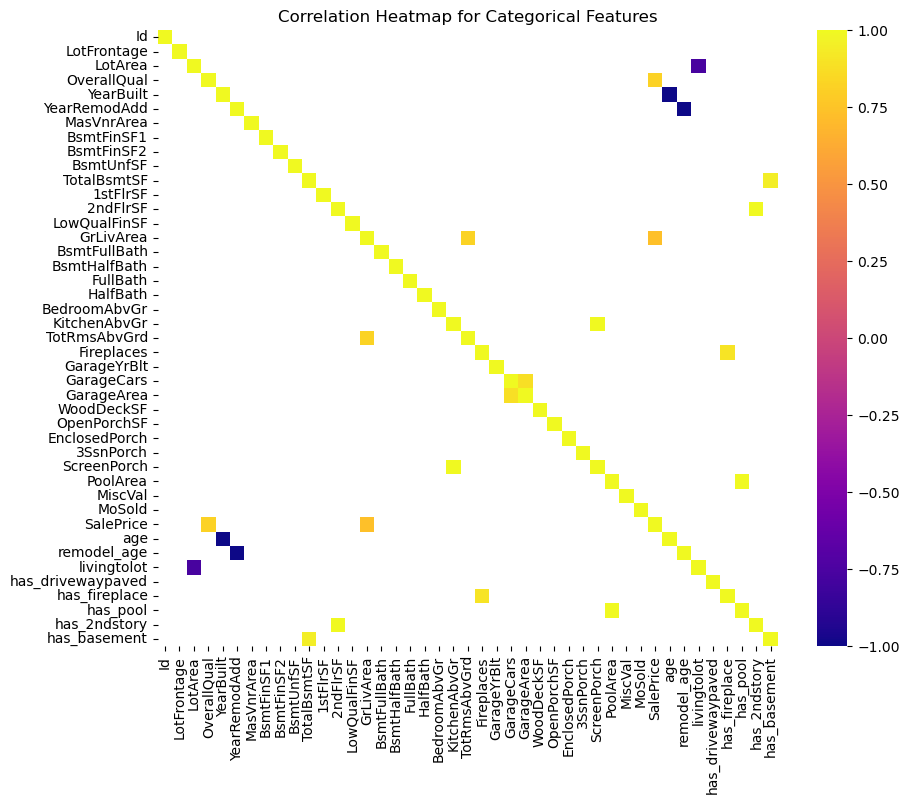

In [253]:
plt.figure(figsize=(10,8),)
sns.heatmap((train.corr(numeric_only=True)[(train.corr(numeric_only=True) >= 0.7) | (train.corr(numeric_only=True) <= -0.7)]), cmap='plasma', annot=False, annot_kws={"size": 1, "color": 'black'})
plt.title('Correlation Heatmap for Categorical Features')
plt.show()

YearBuilt age,                  remove yearbuilt
YearRemodAdd remodel_age        remove YearRemoAdd
Fireplaces has_fireplace        remove Fireplaces
PoolArea has_pool               remove has_pool

LotArea livingtolot             remove livingtolot
ToRmsAbvGrd GrLivArea ScreenPorch remove ScreenPorch, maybe ToRmsAbvGrd

KitchenAbvGr ScreenPorch        remove ScreenPorch
GarageCars GarageArea           remove GarageArea

add back
LotShape
ExterCond
'BsmtCond',
'BsmtExposure'
MasVnrArea
'BsmtFinSF2',
'BsmtUnfSF',
'2ndFlrSF',
'LowQualFinSF',
'BsmtFullBath',
'FullBath',
'BedroomAbvGr',
'KitchenAbvGr',
'OpenPorchSF',
'EnclosedPorch',
'MoSold',
'YrSold'

## Datatype conversions

In [97]:
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['GarageFinish'] = train['GarageFinish'].astype(str)


In [98]:
train['LotFrontage'] = train['LotFrontage'].astype(int)
train['MasVnrArea'] = train['MasVnrArea'].astype(int)

In [99]:
train['YearBuilt'] = pd.to_datetime(train['YearBuilt'], format='%Y').dt.year
train['YearRemodAdd'] = pd.to_datetime(train['YearRemodAdd'], format='%Y').dt.year


In [100]:
train['MoSold'] = pd.to_datetime(train['MoSold'], format='%m').dt.month

In [101]:
train['YrSold'] = pd.to_datetime(train['YrSold'], format='%Y').dt.strftime('%Y')

In [102]:
train['GarageYrBlt'] = train['GarageYrBlt'].astype(int)

## Encoding/Scaling

In [103]:
df = train.copy()

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1457 non-null   int64  
 1   MSSubClass         1457 non-null   object 
 2   MSZoning           1457 non-null   object 
 3   LotFrontage        1457 non-null   int32  
 4   LotArea            1457 non-null   float64
 5   Street             1457 non-null   object 
 6   Alley              1457 non-null   object 
 7   LotShape           1457 non-null   object 
 8   LandContour        1457 non-null   object 
 9   Utilities          1457 non-null   object 
 10  LotConfig          1457 non-null   object 
 11  LandSlope          1457 non-null   object 
 12  Neighborhood       1457 non-null   object 
 13  Condition1         1457 non-null   object 
 14  Condition2         1457 non-null   object 
 15  BldgType           1457 non-null   object 
 16  HouseStyle         1457 

Ordinal
------------
'LotShape',
'LandContour',
'Utilities',
'LandSlope',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence',
'MiscVal'
'age'
'remodel_age'
'livingtolot'

Nominal
-----------
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'Electrical',
'GarageType',
'PavedDrive',
'MiscFeature',
'SaleType',
'SaleCondition'
'has_drivewaypaved'
'has_fireplace'
'has_pool'

Continuous
-----------
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MoSold',
'YrSold'

### Ordinal

In [105]:
ord_feats_edit = [
'LotShape',
'LandContour',
'Utilities',#
'LandSlope',
'OverallQual',
'OverallCond',
'YearBuilt',#
'YearRemodAdd',#
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',#
'Fence',#
'MiscVal',

'age',
'remodel_age',
'livingtolot'#
]
ord_feats = train[ord_feats_edit]

ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
ord_feats_encoded
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,age,remodel_age,livingtolot
0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,2.0,4.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,3.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,7.0,7.0,18.0
1,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,2.0,4.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,5.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,34.0,34.0,11.0
2,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,2.0,4.0,2.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,9.0,8.0,14.0
3,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,4.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,2.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,92.0,40.0,16.0
4,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,2.0,4.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,10.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,3.0,3.0,0.0,0.0,5.0,4.0,100.0,50.0,3.0,4.0,2.0,4.0,4.0,6.0,6.0,0.0,1.0,3.0,6.0,5.0,86.0,2.0,5.0,5.0,3.0,4.0,0.0,11.0,10.0,19.0
1453,3.0,3.0,0.0,0.0,5.0,5.0,79.0,38.0,3.0,4.0,2.0,4.0,4.0,0.0,5.0,4.0,1.0,3.0,2.0,5.0,65.0,3.0,5.0,5.0,3.0,2.0,0.0,32.0,22.0,14.0
1454,3.0,3.0,0.0,0.0,6.0,8.0,44.0,56.0,0.0,2.0,4.0,1.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,2.0,30.0,2.0,5.0,5.0,3.0,0.0,17.0,67.0,4.0,24.0
1455,3.0,3.0,0.0,0.0,4.0,5.0,51.0,46.0,3.0,4.0,4.0,4.0,2.0,2.0,5.0,2.0,1.0,2.0,6.0,3.0,37.0,3.0,5.0,5.0,3.0,4.0,0.0,60.0,14.0,9.0


In [106]:
df.drop(columns=ord_feats, inplace=True)
df = df.merge(new_ord_feats, left_index=True, right_index=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has_drivewaypaved,has_fireplace,has_pool,has_2ndstory,has_basement,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,age,remodel_age,livingtolot
0,1,4.110873864173311,RL,4,9.042040,Pave,NA,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,5,PConc,6.561031,0.000000,5.017280,6.753438,GasA,SBrkr,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,Attchd,2,548,Y,0.000000,4.127134,0.000000,0.0,0.526589,0.0,NA,2,2008,WD,Normal,12.247699,1,0,0.0,1,1,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,2.0,4.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,3.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,7.0,7.0,18.0
1,2,3.044522437723423,RL,4,9.169623,Pave,NA,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NA,0,CBlock,6.886532,0.000000,5.652489,7.141245,GasA,SBrkr,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,Attchd,2,460,Y,5.700444,0.000000,0.000000,0.0,0.526589,0.0,NA,5,2007,WD,Normal,12.109016,1,1,0.0,0,1,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,2.0,4.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,5.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,34.0,34.0,11.0
2,3,4.110873864173311,RL,4,9.328212,Pave,NA,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,5,PConc,6.188264,0.000000,6.075346,6.825460,GasA,SBrkr,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,Attchd,2,608,Y,0.000000,3.761200,0.000000,0.0,0.526589,0.0,NA,9,2008,WD,Normal,12.317171,1,1,0.0,1,1,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,2.0,4.0,2.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,9.0,8.0,14.0
3,4,4.2626798770413155,RL,4,9.164401,Pave,NA,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NA,0,BrkTil,5.379897,0.000000,6.293419,6.629363,GasA,SBrkr,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,7,1,Detchd,3,642,Y,0.000000,3.583519,5.609472,0.0,0.526589,0.0,NA,2,2006,WD,Abnorml,11.849405,1,1,0.0,1,1,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,4.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,2.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,92.0,40.0,16.0
4,5,4.110873864173311,RL,4,9.565284,Pave,NA,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,5,PConc,6.486161,0.000000,6.196444,7.044033,GasA,SBrkr,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,9,1,Attchd,3,836,Y,5.262690,4.442651,0.000000,0.0,0.526589,0.0,NA,12,2008,WD,Normal,12.429220,1,1,0.0,1,1,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,2.0,4.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,10.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1456,4.110873864173311,RL,4,8.976894,Pave,NA,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,0,PConc,0.000000,0.000000,6.860664,6.860664,GasA,SBrkr,6.860664,6.543912,0.0,7.407318,0,0.000000,2,1,3,0.693147,7,1,Attchd,2,460,Y,0.000000,3.713572,0.000000,0.0,0.526589,0.0,NA,8,2007,WD,Normal,12.072547,1,1,0.0,1,1,3.0,3.0,0.0,0.0,5.0,4.0,100.0,50.0,3.0,4.0,2.0,4.0,4.

## Nominal Encoding

In [107]:
nom_feats_edit = [
'MSSubClass',
'MSZoning',
'Street',#
'Alley',#
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'Electrical',
'GarageType',
'PavedDrive',
'MiscFeature',#
'SaleType',
'SaleCondition',

'has_drivewaypaved',
'has_fireplace',
'has_pool',#
'has_2ndstory',
'has_basement'
]
nom_feats = train[nom_feats_edit]

one = ce.OneHotEncoder(use_cat_names=True)
one.fit(nom_feats)
nom_feats_encoded = one.transform(nom_feats)
nom_feats_encoded

,MSSubClass_4.110873864173311,MSSubClass_3.044522437723423,MSSubClass_4.2626798770413155,MSSubClass_3.9318256327243257,MSSubClass_5.25227342804663,MSSubClass_3.828641396489095,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_3.4339872044851463,MSSubClass_4.454347296253507,MSSubClass_4.394449154672439,MSSubClass_5.081404364984463,MSSubClass_4.330733340286331,MSSubClass_5.198497031265826,MSSubClass_3.713572066704308,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,Alley_Grvl,Alley_Pave,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,...,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,MasVnrType_BrkCmn,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,has_drivewaypaved,has_fireplace,has_pool,has_2ndstory,has_basement
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,1,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.0,1,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0

In [108]:
df.drop(columns=nom_feats, inplace=True)
df = df.merge(nom_feats_encoded, left_index=True, right_index=True)
df

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,age,remodel_age,...,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,MasVnrType_BrkCmn,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,has_drivewaypaved,has_fireplace,has_pool,has_2ndstory,has_basement
0,1,4,9.042040,5,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,2,548,0.000000,4.127134,0.000000,0.0,0.526589,0.0,2,2008,12.247699,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,2.0,4.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,3.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,7.0,7.0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,1,1
1,2,4,9.169623,0,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,2,460,5.700444,0.000000,0.000000,0.0,0.526589,0.0,5,2007,12.109016,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,2.0,4.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,5.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,34.0,34.0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,0,1
2,3,4,9.328212,5,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,2,608,0.000000,3.761200,0.000000,0.0,0.526589,0.0,9,2008,12.317171,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,2.0,4.0,2.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,9.0,8.0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1
3,4,4,9.164401,0,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,7,1,3,642,0.000000,3.583519,5.609472,0.0,0.526589,0.0,2,2006,11.849405,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,4.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,2.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,92.0,40.0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.0,1,1
4,5,4,9.565284,5,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,9,1,3,836,5.262690,4.442651,0.000000,0.0,0.526589,0.0,12,2008,12.429220,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,2.0,4.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,10.0,10.0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Scaling

In [109]:
scaler_minmax = MinMaxScaler()
cont_feats_edit = [
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',#
'Fireplaces',#
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',#
'PoolArea',
'MoSold',
'YrSold'
]

cont_feats = train[cont_feats_edit]

scaler_minmax.fit(cont_feats)
cont_feats_scaled = scaler_minmax.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,0.5,0.417379,0.714286,0.759508,0.000000,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.605455,0.0,0.090909,0.50
1,0.5,0.445837,0.000000,0.797188,0.000000,0.728731,0.819153,0.502753,0.000000,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.605455,0.0,0.363636,0.25
2,0.5,0.481212,0.714286,0.716357,0.000000,0.783246,0.782930,0.383123,0.886245,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.605455,0.0,0.727273,0.50
3,0.5,0.444673,0.000000,0.622780,0.000000,0.811361,0.760436,0.399623,0.868471,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.605455,0.0,0.090909,0.00
4,0.5,0.534093,0.714286,0.750841,0.000000,0.798858,0.808002,0.465926,0.911832,0.0,0.666289,0.333333,0.00000,0.666667,0.5,0.500,0.5,0.583333,0.333333,0.75,0.589563,0.779126,0.704481,0.000000,0.0,0.605455,0.0,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0.5,0.402847,0.000000,0.000000,0.000000,0.884491,0.786968,0.396460,0.857277,0.0,0.564152,0.000000,0.00000,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.50,0.324401,0.000000,0.588869,0.000000,0.0,0.605455,0.0,0.636364,0.25
1453,0.5,0.516442,0.571429,0.772504,0.698955,0.822539,0.842121,0.690649,0.000000,0.0,0.645566,0.333333,0.00000,0.666667,0.0,0.375,0.5,0.416667,0.666667,0.50,0.352609,0.867250,0.000000,0.000000,0.0,0.605455,0.0,0.090909,1.00
1454,0.5,0.432481,0.000000,0.650620,0.000000,0.873788,0.808700,0.479880,0.923592,0.0,0.688447,0.000000,0.00000,0.666667,0.0,0.500,0.5,0.583333,0.666667,0.25,0.177715,0.000000,0.651870,0.000000,0.0,0.605455,0.0,0.363636,1.00
1455,0.5,0.448539,0.000000,0.452858,0.950784,0.000000,0.801091,0.443104,0.000000,0.0,0.414179,0.333333,0.00000,0.333333,0.0,0.250,0.5,0.250000,0.000000,0.25,0.169252,0.874272,0.000000,0.748554,0.0,0.605455,0.0,0.272727,1.00


In [110]:
df.drop(columns=cont_feats, inplace=True)
df = df.merge(new_cont_feats, left_index=True, right_index=True)
df

,Id,SalePrice,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,age,remodel_age,livingtolot,MSSubClass_4.110873864173311,MSSubClass_3.044522437723423,MSSubClass_4.2626798770413155,MSSubClass_3.9318256327243257,MSSubClass_5.25227342804663,MSSubClass_3.828641396489095,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_3.4339872044851463,MSSubClass_4.454347296253507,MSSubClass_4.394449154672439,MSSubClass_5.081404364984463,MSSubClass_4.330733340286331,MSSubClass_5.198497031265826,MSSubClass_3.713572066704308,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,Alley_Grvl,Alley_Pave,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,...,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,has_drivewaypaved,has_fireplace,has_pool,has_2ndstory,has_basement,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,1,12.247699,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,2.0,4.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,3.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,7.0,7.0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,1,1,0.5,0.417379,0.714286,0.759508,0.000000,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.605455,0.0,0.090909,0.50
1,2,12.109016,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,2.0,4.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,5.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,34.0,34.0,11.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,0,1,0.5,0.445837,0.000000,0.797188,0.000000,0.728731,0.819153,0.502753,0.000000,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.605455,0.0,0.363636,0.25
2,3,12.317171,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,2.0,4.0,2.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,9.0,8.0,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1,0.5,0.481212,0.714286,0.716357,0.000000,0.783246,0.782930,0.383123,0.886245,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.605455,0.0,0.727273,0.50
3,4,11.849405,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,4.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,2.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,92.0,40.0,16.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.0,1,1,0.5,0.444673,0.000000,0.622780,0.000000,0.811361,0.760436,0.399623,0.868471,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.605455,0.0,0.090909,0.00
4,5,12.429220,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,2.0,4.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,10.0,10.0,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1,0.5,0.534093,0.714286,0.750841,0.000000,0.798858,0.808002,0.4

## Drop Features

In [111]:
df

,Id,SalePrice,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,age,remodel_age,livingtolot,MSSubClass_4.110873864173311,MSSubClass_3.044522437723423,MSSubClass_4.2626798770413155,MSSubClass_3.9318256327243257,MSSubClass_5.25227342804663,MSSubClass_3.828641396489095,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_3.4339872044851463,MSSubClass_4.454347296253507,MSSubClass_4.394449154672439,MSSubClass_5.081404364984463,MSSubClass_4.330733340286331,MSSubClass_5.198497031265826,MSSubClass_3.713572066704308,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,Alley_Grvl,Alley_Pave,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,...,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,has_drivewaypaved,has_fireplace,has_pool,has_2ndstory,has_basement,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,1,12.247699,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,2.0,4.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,3.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,7.0,7.0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,1,1,0.5,0.417379,0.714286,0.759508,0.000000,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.605455,0.0,0.090909,0.50
1,2,12.109016,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,2.0,4.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,5.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,34.0,34.0,11.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,0,1,0.5,0.445837,0.000000,0.797188,0.000000,0.728731,0.819153,0.502753,0.000000,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.605455,0.0,0.363636,0.25
2,3,12.317171,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,2.0,4.0,2.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,9.0,8.0,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1,0.5,0.481212,0.714286,0.716357,0.000000,0.783246,0.782930,0.383123,0.886245,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.605455,0.0,0.727273,0.50
3,4,11.849405,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,4.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,2.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,92.0,40.0,16.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.0,1,1,0.5,0.444673,0.000000,0.622780,0.000000,0.811361,0.760436,0.399623,0.868471,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.605455,0.0,0.090909,0.00
4,5,12.429220,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,2.0,4.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,10.0,10.0,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1,0.5,0.534093,0.714286,0.750841,0.000000,0.798858,0.808002,0.4

## Train Test Split

In [112]:
y = df['SalePrice']
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1452    12.072547
1453    12.254868
1454    12.493133
1455    11.864469
1456    11.901590
Name: SalePrice, Length: 1457, dtype: float64

## Drop Features

In [113]:
x = df.drop(['Id', 'SalePrice',
            
# 'GarageArea',
# 'livingtolot',
# 'Fireplaces',
# 'TotRmsAbvGrd',
# 'YearBuilt',
# 'YearRemodAdd',
# 'has_pool',
# 'ScreenPorch',

# 'PoolQC',
# 'MiscFeature',
# 'Alley',
# 'Fence',

# 'Utilities',
# 'Street'




          ], axis=1)
x

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,age,remodel_age,livingtolot,MSSubClass_4.110873864173311,MSSubClass_3.044522437723423,MSSubClass_4.2626798770413155,MSSubClass_3.9318256327243257,MSSubClass_5.25227342804663,MSSubClass_3.828641396489095,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_3.4339872044851463,MSSubClass_4.454347296253507,MSSubClass_4.394449154672439,MSSubClass_5.081404364984463,MSSubClass_4.330733340286331,MSSubClass_5.198497031265826,MSSubClass_3.713572066704308,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,Alley_Grvl,Alley_Pave,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,...,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,has_drivewaypaved,has_fireplace,has_pool,has_2ndstory,has_basement,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,2.0,4.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,3.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,7.0,7.0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,1,1,0.5,0.417379,0.714286,0.759508,0.000000,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.605455,0.0,0.090909,0.50
1,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,2.0,4.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,5.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,34.0,34.0,11.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,0,1,0.5,0.445837,0.000000,0.797188,0.000000,0.728731,0.819153,0.502753,0.000000,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.605455,0.0,0.363636,0.25
2,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,2.0,4.0,2.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,9.0,8.0,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1,0.5,0.481212,0.714286,0.716357,0.000000,0.783246,0.782930,0.383123,0.886245,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.605455,0.0,0.727273,0.50
3,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,4.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,2.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,92.0,40.0,16.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.0,1,1,0.5,0.444673,0.000000,0.622780,0.000000,0.811361,0.760436,0.399623,0.868471,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.605455,0.0,0.090909,0.00
4,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,2.0,4.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,5.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,10.0,10.0,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1,0.5,0.534093,0.714286,0.750841,0.000000,0.798858,0.808002,0.465926,0.911832,0.0,0.

In [114]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1165, 245), (1165,), (292, 245), (292,))

In [115]:
# r = Ridge(alpha=2)
# ridge_model = r.fit(xtrain,ytrain)
# test_pred = ridge_model.predict(xtest)
# test_pred


In [116]:
l = Lasso(alpha=.0011) #.0011
lasso_model = l.fit(xtrain, ytrain)
test_pred = lasso_model.predict(xtest)
test_pred

array([12.41815838, 12.04752505, 11.80542178, 12.5199285 , 12.52030472,
       11.51714973, 12.22904442, 11.70380935, 12.30968536, 12.48421757,
       11.57242212, 12.24258212, 12.70802449, 11.82782727, 12.08868824,
       11.92289505, 12.38274883, 11.50266152, 11.84039942, 11.87536864,
       12.58985386, 11.71460205, 11.6719086 , 11.50916587, 11.62099483,
       11.71582959, 12.07912772, 11.84342371, 11.88790837, 11.76004333,
       11.93720657, 12.36501597, 12.07255532, 12.26809553, 12.23758709,
       11.89250096, 11.71660602, 11.84929153, 12.05880287, 11.74215615,
       11.75680582, 12.7641767 , 12.08783564, 11.77342443, 12.02353582,
       12.44138799, 11.91502072, 12.25711404, 11.34198283, 12.42602396,
       12.40324012, 12.75388664, 11.40665251, 12.31873698, 12.7194939 ,
       12.23052038, 12.63337047, 11.77210815, 11.96285495, 11.74378636,
       12.01617381, 11.78878128, 11.90995145, 11.86140644, 11.70183513,
       11.60027509, 12.26855436, 12.10590041, 11.74490735, 11.81

In [117]:
# param_grid = {
#     'learning_rate': [0.05, 0.1, .5],
#     'max_depth': [1,2,3],
#     'n_estimators': [750, 850, 1000],
#     'alpha': [ 0.5, 0.75, 1],
#     'lambda': [0, 0.1, 0.5, 1]
# }

In [118]:
# xgbr = xgb.XGBRegressor(n_estimators=1000, max_depth=2, alpha=0.5, learning_rate=0.05, reg_lambda=0)
# xgbr.fit(xtrain, ytrain)
# test_pred = xgbr.predict(xtest)
# test_pred

In [119]:
# grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
# grid_search.fit(xtrain, ytrain)

In [120]:
# grid_search.best_params_

2 new engineered feats
'alpha': 0.5,
 'lambda': 0,
 'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 1000}

Removed feats over 80% null

{'alpha': 0.5,
 'lambda': 0,
 'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 1000}

Full Features removed multicolinearity feats

{'alpha': 0.5,
 'lambda': 0,
 'learning_rate': 0.1,
 'max_depth': 1,
 'n_estimators': 1000}

Added more range for hyperparameter for gridsearch
{'alpha': 0.5,
 'lambda': 0,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 750}

Full Features
{'alpha': 0.1,
 'lambda': 0,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}


Removed Features
{'alpha': 0.1,
 'lambda': 0,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

Full features
{'alpha': 0.1,
 'lambda': 0.1,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [121]:
# grid_search.best_estimator_

## Feature tuning

In [122]:
# feature_importance = xgbr.get_booster().get_score(importance_type='gain')
# sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
# for feature, score in sorted_importance:
#     print(f"Feature: {feature}, Gain Score: {score}")

FullBath
BsmtExposure
BsmtFullBath
BsmtCond
BsmtUnfSF
OpenPorchSF
2ndFlrSF
KitchenAbvGr
ExterCond
LotShape
MoSold
BsmtFinSF2
GarageCond
FireplaceQu
YrSold
ExterQual
EnclosedPorch
BsmtFinType2
livingtolot
Fence
BedroomAbvGr
MasVnrArea
Fireplaces
TotRmsAbvGrd
LowQualFinSF


Feature: FullBath, Gain Score: 0.037261027842760086
Feature: BsmtExposure, Gain Score: 0.03175738826394081
Feature: BsmtFullBath, Gain Score: 0.03127452731132507
Feature: BsmtCond, Gain Score: 0.029916634783148766
Feature: BsmtUnfSF, Gain Score: 0.027515120804309845
Feature: OpenPorchSF, Gain Score: 0.027085989713668823
Feature: 2ndFlrSF, Gain Score: 0.024306440725922585
Feature: KitchenAbvGr, Gain Score: 0.021241173148155212
Feature: ExterCond, Gain Score: 0.020119743421673775
Feature: LotShape, Gain Score: 0.01933232881128788
Feature: MoSold, Gain Score: 0.01592753455042839
Feature: BsmtFinSF2, Gain Score: 0.014833453111350536
Feature: GarageCond, Gain Score: 0.013538038358092308
Feature: FireplaceQu, Gain Score: 0.01302193384617567
Feature: YrSold, Gain Score: 0.012462259270250797
Feature: ExterQual, Gain Score: 0.01177066657692194
Feature: EnclosedPorch, Gain Score: 0.011662710458040237
Feature: BsmtFinType2, Gain Score: 0.010969261638820171
Feature: livingtolot, Gain Score: 0.010938950814306736
Feature: Fence, Gain Score: 0.010284329764544964
Feature: BedroomAbvGr, Gain Score: 0.008486876264214516
Feature: MasVnrArea, Gain Score: 0.006397106219083071
Feature: Fireplaces, Gain Score: 0.005130569916218519
Feature: TotRmsAbvGrd, Gain Score: 0.005124207586050034
Feature: LowQualFinSF, Gain Score: 0.003461066633462906


In [123]:
train_pred = lasso_model.predict(xtrain)
train_pred 

array([11.26948543, 11.44852103, 11.28706747, ..., 11.39558199,
       11.6542464 , 12.02552504])

In [124]:
# train_pred = ridge_model.predict(xtrain)
# train_pred 

In [125]:
ytrain = np.expm1(ytrain)
ytest = np.expm1(ytest)
test_pred = np.expm1(test_pred)
train_pred = np.expm1(train_pred)

## RMSE

In [126]:
print('RMSE Test:', mean_squared_error(ytest, test_pred)**0.5)
print('RMSE Train:', mean_squared_error(ytrain, train_pred)**0.5)

RMSE Test: 35079.36090836395
RMSE Train: 25695.10901924542


Lasso alpha .0011 BEST ONE YET
RMSE Test: 35018.22611591167
RMSE Train: 25516.543237872032

Lasso alpha 0.0005
RMSE Test: 35818.9306485806
RMSE Train: 20962.018232238785

Lasso alpha 1
RMSE Test: 35386.2524312774
RMSE Train: 19611.34578194941

Ridge alpha 1000
RMSE Test: 49480.665764122845
RMSE Train: 40144.074719644

Ridge 
RMSE Test: 73583.7833810682
RMSE Train: 61883.20494199522

Added 2 engineered feats
RMSE Test: 35351.92491286159
RMSE Train: 15389.645148874757

Removed feats with over 80% nulls adjusted hyperparams
RMSE Test: 35275.117912157686
RMSE Train: 15351.669390939254

Removed feats with over 80% nulls
RMSE Test: 34653.368076397834
RMSE Train: 19468.87030712404

Added back all features except the multicolinear ones with new hyperparameters
RMSE Test: 34677.965043235934
RMSE Train: 19466.87229143391

Added back all features except the multicolinear ones
RMSE Test: 36409.41631304772
RMSE Train: 13455.970554270694

New paramters for less feats
RMSE Test: 34464.95364831345
RMSE Train: 14190.110901715856

Removed low gain feats
RMSE Test: 34363.416464738395
RMSE Train: 14821.40222213129

New CV parameters
RMSE Test: 35205.783625212076
RMSE Train: 13694.088373515591

Full features hyperparam retuned 10 folds
RMSE Test: 36214.68274386676
RMSE Train: 12317.97588992322

Adjust XGBRegressor hyperparameters for removed features
RMSE Test: 35496.19007921568
RMSE Train: 12246.06107417036

Removed
'LotShape', 'LandSlope', 'FireplaceQu', 'MiscVal',
                  'PavedDrive', 
                  'MasVnrArea','LowQualFinSF','BedroomAbvGr', 'Fireplaces','YrSold'
RMSE Test: 36189.83019906432
RMSE Train: 12251.095861526903

Removed 'LotShape', 'LandSlope', 'PavedDrive', 'BedroomAbvGr', 'Fireplaces'
RMSE Test: 36600.686703738575
RMSE Train: 12274.515564079707

Used CV on XGBRegressor hyperparameters plus feat engineering
RMSE Test: 36317.66089312002
RMSE Train: 12304.046470552174


Redid outlier location
RMSE Test: 34893.35535457464
RMSE Train: 3654.4580150039133


Removed outliers, transformed skews
RMSE Test: 32851.273268259174
RMSE Train: 3333.8950649465446

Baseline: removed outliers
RMSE : 31810.004274811527
Removed feats with over 80% nulls
RMSE Test: 34653.368076397834
RMSE Train: 19468.87030712404

Added back all features except the multicolinear ones with new hyperparameters
RMSE Test: 34677.965043235934
RMSE Train: 19466.87229143391

Added back all features except the multicolinear ones
RMSE Test: 36409.41631304772
RMSE Train: 13455.970554270694

New paramters for less feats
RMSE Test: 34464.95364831345
RMSE Train: 14190.110901715856

Removed low gain feats
RMSE Test: 34363.416464738395
RMSE Train: 14821.40222213129

New CV parameters
RMSE Test: 35205.783625212076
RMSE Train: 13694.088373515591

Full features hyperparam retuned 10 folds
RMSE Test: 36214.68274386676
RMSE Train: 12317.97588992322

Adjust XGBRegressor hyperparameters for removed features
RMSE Test: 35496.19007921568
RMSE Train: 12246.06107417036

Removed
'LotShape', 'LandSlope', 'FireplaceQu', 'MiscVal',
                  'PavedDrive', 
                  'MasVnrArea','LowQualFinSF','BedroomAbvGr', 'Fireplaces','YrSold'
RMSE Test: 36189.83019906432
RMSE Train: 12251.095861526903

Removed 'LotShape', 'LandSlope', 'PavedDrive', 'BedroomAbvGr', 'Fireplaces'
RMSE Test: 36600.686703738575
RMSE Train: 12274.515564079707

Used CV on XGBRegressor hyperparameters plus feat engineering
RMSE Test: 36317.66089312002
RMSE Train: 12304.046470552174


Redid outlier location
RMSE Test: 34893.35535457464
RMSE Train: 3654.4580150039133


Removed outliers, transformed skews
RMSE Test: 32851.273268259174
RMSE Train: 3333.8950649465446

Baseline: removed outliers
RMSE : 31810.004274811527

# TEST

In [127]:
test = pd.read_csv(r'D:\Data Science\Projects\Housing Project\Data\test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

In [128]:
# test = pd.read_csv('/Volumes/Samsung USB/Data Science/Projects/Housing Project/Data/test.csv')
# test

## Data Cleaning

### Null Features

In [129]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [130]:
test.select_dtypes(include='object').isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
FireplaceQu       730
GarageCond         78
GarageQual         78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType2       42
BsmtFinType1       42
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
KitchenQual         1
SaleType            1
Exterior1st         1
LotShape            0
LandContour         0
PavedDrive          0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
Electrical          0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Street              0
Foundation          0
ExterCond           0
ExterQual           0
SaleCondition       0
dtype: int64

In [131]:
test.select_dtypes(include=('int', 'float')).isnull().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

#### MSZoning

In [132]:
test['MSZoning'].value_counts()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64

In [133]:
test[test['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,NaN,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,NaN,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [134]:
# test['MSZoning'] = train.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [135]:
mode_dict = train.groupby('Neighborhood')['MSZoning'].apply(lambda x: x.mode().iloc[0]).to_dict()
test.loc[test['MSZoning'].isnull(), 'MSZoning'] = test['Neighborhood'].map(mode_dict)

test['MSZoning'].isnull().sum()

0

#### Lot Frontage

In [136]:
mode_dict = train.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.mean()).to_dict()
test.loc[test['LotFrontage'].isnull(), 'LotFrontage'] = test['Neighborhood'].map(mode_dict)

test['LotFrontage'].isnull().sum()

0

#### Alley

In [137]:
test['Alley'] = np.where(test['Alley'].isnull(), 'NA', test['Alley']) #we can assume the null values as no alleys, because it is the only missing value and is the biggest count
test['Alley'].isnull().sum()

0

#### Utilities

In [138]:
test['Utilities'].value_counts()

Utilities
AllPub    1457
Name: count, dtype: int64

In [139]:
test['Utilities'] = np.where(test['Utilities'].isnull(), train['Utilities'].mode(), test['Utilities'])
test['Utilities'].isnull().sum()

0

#### Exterior1st

In [140]:
test['Exterior1st'].value_counts()

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: count, dtype: int64

In [141]:
test[test['Exterior1st'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,NaN,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [142]:
test['Exterior1st'] = np.where(test['Exterior1st'].isnull(), train['Exterior1st'].mode(), test['Exterior1st'])
test['Exterior1st'].isnull().sum()

0

#### Exterior2nd

In [143]:
test['Exterior2nd'] = np.where(test['Exterior2nd'].isnull(), train['Exterior2nd'].mode(), test['Exterior2nd'])
test['Exterior2nd'].isnull().sum()

0

#### MasVnrType

In [144]:
test['MasVnrType'].value_counts()

MasVnrType
BrkFace    434
Stone      121
BrkCmn      10
Name: count, dtype: int64

In [145]:
test['MasVnrType'] = np.where(test['MasVnrType'].isnull(), 'NA', test['MasVnrType']) #it is missing None and is the largest value count
test['MasVnrType'].isnull().sum()

0

#### MasVnrArea

In [146]:
test[test['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
231,1692,60,RL,4.012658,12891,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
246,1707,20,FV,90.000000,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial
422,1883,60,RL,70.000000,8749,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
532,1993,60,RL,4.012658,7750,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
544,2005,20,RL,87.000000,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
581,2042,60,FV,3.732558,7500,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Ex,Y,SBrkr,952,860,0,1812,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,469.0,TA,TA,Y,144,112,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
851,2312,60,RL,59.000000,15810,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,768,728,0,1496,0.0,0.0,3,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Unf,2.0,572.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
865,2326,80,RL,4.012658,11950,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Ex,Y,SBrkr,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2003.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
880,2341,20,RL,85.000000,9965,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
889,2350,60,FV,112.000000,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip

In [147]:
test['MasVnrArea'] = np.where(test['MasVnrArea'].isnull(), 0, test['MasVnrArea'])
test['MasVnrArea'].isnull().sum()

0

#### BsmtQual

In [148]:
test['BsmtQual'] = np.where(test['BsmtQual'].isnull(), 'NA', test['BsmtQual']) #these values have TotalBsmtSF as 0 so there is no basement
test['BsmtQual'].isnull().sum()

0

#### BsmtCond

In [149]:
test['BsmtCond'] =  np.where(test['BsmtCond'].isnull(), 'NA', test['BsmtCond']) #these values have TotalBsmtSF as 0 so there is no basement
test['BsmtCond'].isnull().sum()

0

#### BsmtExposure

In [150]:
test['BsmtExposure'] = np.where((test['BsmtExposure'].isnull()) & (test['TotalBsmtSF']==0), 'NA', test['BsmtExposure'])
test['BsmtExposure'] = np.where(test['BsmtExposure'].isnull(), train['BsmtExposure'].mode(), test['BsmtExposure'])
test['BsmtExposure'].isnull().sum()

0

#### BsmtFinType1

In [151]:
test['BsmtFinType1'] = np.where(test['BsmtFinType1'].isnull(), 'NA', test['BsmtFinType1']) #these values have TotalBsmtSF as 0 so there is no basement
test['BsmtFinType1'].isnull().sum()

0

#### BsmtFinSF1

In [152]:
test[test['BsmtFinSF1'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [153]:
test['BsmtFinSF1'] = np.where(test['BsmtFinSF1'].isnull(), 0, test['BsmtFinSF1'])
test['BsmtFinSF1'].isnull().sum()

0

#### BsmtFinType2

In [154]:
test['BsmtFinType2'] = np.where((test['BsmtFinType2'].isnull() & test['BsmtUnfSF'] > 0), 'Unf', test['BsmtFinType2'])
test['BsmtFinType2'] = np.where(test['BsmtFinType2'].isnull(), 'NA', test['BsmtFinType2'])
test['BsmtFinType2'].isnull().sum()

0

#### BsmtFinSF2

In [155]:
test[test['BsmtFinSF2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [156]:
test['BsmtFinSF2'] = np.where(test['BsmtFinSF2'].isnull(), 0 , test['BsmtFinSF2'])
test['BsmtFinSF2'].isnull().sum()

0

#### BsmtUnfSF

In [157]:
test[test['BsmtUnfSF'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,0.0,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [158]:
test['BsmtUnfSF'] = np.where(test['BsmtUnfSF'].isnull(), 0, test['BsmtUnfSF'])
test['BsmtUnfSF'].isnull().sum()

0

#### TotalBsmtSF

In [159]:
test['TotalBsmtSF'] = np.where(test['TotalBsmtSF'].isnull(), 0 , test['TotalBsmtSF'])
test['BsmtUnfSF'].isnull().sum()

0

#### BsmtFullBath

In [160]:
test[test['BsmtFullBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [161]:
test['BsmtFullBath'] = np.where(test['BsmtFullBath'].isnull(), 0, test['BsmtFullBath'])
test['BsmtFullBath'].isnull().sum()

0

#### BsmtHalfBath

In [162]:
test[test['BsmtHalfBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [163]:
test['BsmtHalfBath'] = np.where(test['BsmtHalfBath'].isnull(), 0, test['BsmtHalfBath'])

#### KitchenQual

In [164]:
test[test['KitchenQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


In [165]:
test['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1393
2      64
0       2
Name: count, dtype: int64

In [166]:
test['KitchenQual'] = np.where(test['KitchenQual'].isnull(), train['KitchenQual'].mode(), test['KitchenQual'])
test['KitchenQual'].isnull().sum()

0

#### Functional

In [167]:
test['Functional'] = np.where(test['Functional'].isnull(), train['Functional'].mode(), test['Functional'])
test['Functional'].isnull().sum()

0

#### FireplaceQu

In [168]:
test['FireplaceQu'] = np.where((test['FireplaceQu'].isnull()) & (test['Fireplaces'] == 0), 'NA', test['FireplaceQu'])
test['FireplaceQu'].isnull().sum()

0

#### GarageType

In [169]:
test['GarageType'] = np.where((test['GarageType'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageType'])
test['GarageType'].isnull().sum()

0

#### GarageYrBuilt

In [170]:
test['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
2008.0    32
1977.0    31
2000.0    28
2002.0    27
1998.0    27
1993.0    27
1950.0    27
1956.0    25
1997.0    25
1999.0    24
1978.0    22
1968.0    22
1976.0    21
1958.0    21
2001.0    21
1967.0    21
1994.0    21
1996.0    20
1979.0    20
1975.0    19
1930.0    19
1959.0    19
1920.0    19
1960.0    18
1961.0    18
1966.0    18
1954.0    18
1963.0    18
1969.0    17
1980.0    17
1995.0    17
1974.0    17
1964.0    17
1973.0    15
1962.0    14
1992.0    14
1957.0    14
1965.0    13
1952.0    13
1972.0    13
1970.0    12
1939.0    12
1971.0    11
1953.0    11
1955.0    11
1951.0    11
1984.0    11
1940.0    11
1990.0    10
1926.0     9
1989.0     9
1938.0     8
1985.0     8
1991.0     8
2009.0     8
1948.0     8
1987.0     7
1910.0     7
1945.0     6
1949.0     6
1988.0     6
1986.0     6
1946.0     5
1981.0     5
1982.0     5
1924.0     5
1925.0     5
1915.0     5
1900.0     5
1942.0     4
1927.0     4


In [171]:
test[test['GarageYrBlt'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,1514,90,RL,98.000000,13260,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,TA,TA,CBlock,TA,TA,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml
71,1532,30,RM,56.000000,4485,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,PConc,TA,TA,No,BLQ,579.0,Unf,0.0,357.0,936.0,GasA,TA,Y,SBrkr,936,0,0,936,1.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,NA,NaN,NaN,0.0,0.0,NaN,NaN,P,51,0,135,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
79,1540,190,RM,100.000000,9045,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,3,1910,1950,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,Fa,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,840.0,840.0,Grav,Fa,N,FuseF,1128,1128,0,2256,0.0,0.0,2,0,4,2,Fa,12,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,0,18,18,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
92,1553,70,RM,60.000000,12900,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,8,1912,2009,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,Gd,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,Ex,Y,SBrkr,780,780,0,1560,0.0,0.0,1,1,3,1,Gd,7,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,344,0,0,0,168,0,NaN,NaN,NaN,0,5,2010,WD,Normal
96,1557,190,RL,60.000000,9900,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,1.5Fin,5,4,1915,1950,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,Fa,Fa,BrkTil,TA,TA,No,Rec,1026.0,Unf,0.0,186.0,1212.0,GasA,TA,N,SBrkr,1212,180,0,1392,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,168,0,0,0,NaN,NaN,NaN,0,2,2010,ConLD,Normal
98,1559,70,C (all),3.720000,6449,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,4,1,1907,1950,Gambrel,CompShg,Wd Sdng,Stucco,NA,0.0,TA,TA,CBlock,TA,TA,No,Rec,73.0,Unf,0.0,634.0,707.0,GasW,TA,N,SBrkr,942,942,0,1884,0.0,0.0,1,1,4,1,TA,7,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,239,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Abnorml
100,1561,90,RL,72.000000,10773,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,3,1967,1967,Gable,Tar&Grv,Plywood,Plywood,BrkFace,72.0,Fa,Fa,CBlock,TA,TA,No,ALQ,704.0,Unf,0.0,1128.0,1832.0,GasA,TA,N,SBrkr,1832,0,0,1832,2.0,0.0,2,0,4,2,TA,8,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,58,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
130,1591,20,RL,64.000000,6410,Pave,NA,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1958,1958,Hip,CompShg,WdShing,Wd Shng,NA,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,960.0,960.0,GasA,Ex,Y,SBrkr,960,0,0,960,0.0,0.0,1,0,3,1,TA,5,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
133,1594,90,RH,60.000000,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
134,1595,50,RL,51.000000,9839,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,2,1931,1950,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,T

In [172]:
test['GarageYrBlt'] = np.where((test['GarageYrBlt'].isnull()) & (test['GarageArea']== 0.0), 0.0, test['GarageYrBlt'])
test['GarageYrBlt'] = np.where((test['GarageYrBlt'].isnull()) , test['YearRemodAdd'], test['GarageYrBlt'])
test['GarageYrBlt'].isnull().sum()

0

In [173]:
test['GarageYrBlt'] = test['GarageYrBlt'].astype(int)

#### GarageFinish

In [174]:
test['GarageFinish'] = np.where((test['GarageFinish'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageFinish'])
test['GarageFinish'] = np.where(test['GarageFinish'].isnull(), train['GarageFinish'].mode(), test['GarageFinish'])
test['GarageFinish'].isnull().sum()

0

#### GarageCars

In [175]:
test['GarageCars'] = np.where(test['GarageCars'].isnull(), train['GarageCars'].mode(), test['GarageCars'])
test['GarageCars'].isnull().sum()

0

#### GarageArea

In [176]:
test['GarageArea'] = np.where(test['GarageArea'].isnull(), train['GarageArea'].mean(), test['GarageArea'])
test['GarageArea'].isnull().sum()

0

#### GarageQual

In [177]:
test['GarageQual'].value_counts()

GarageQual
TA    1293
Fa      76
Gd      10
Po       2
Name: count, dtype: int64

In [178]:
test['GarageQual'] = np.where((test['GarageQual'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageQual'])

In [179]:
test[test['GarageQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NA,Detchd,1983,Unf,1.0,360.00000,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
1116,2577,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,NA,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,1999,Unf,2.0,472.97186,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [180]:
test['GarageQual'].value_counts()

GarageQual
TA    1293
NA      76
Fa      76
Gd      10
Po       2
Name: count, dtype: int64

In [181]:
mode_dict = train.groupby('GarageFinish')['GarageQual'].apply(lambda x: x.mode().iloc[0]).to_dict()
test.loc[test['GarageQual'].isnull(), 'GarageQual'] = test['GarageFinish'].map(mode_dict)
test['GarageQual'].isnull().sum()

0

In [182]:
test['GarageQual'].value_counts()

GarageQual
TA    1295
NA      76
Fa      76
Gd      10
Po       2
Name: count, dtype: int64

#### GarageCond

In [183]:
test['GarageCond'].value_counts()

GarageCond
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: count, dtype: int64

In [184]:
test['GarageCond'] = np.where((test['GarageCond'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageCond'])


In [185]:
test['GarageCond'].value_counts()

GarageCond
TA    1328
NA      76
Fa      39
Po       7
Gd       6
Ex       1
Name: count, dtype: int64

In [186]:
mode_dict = train.groupby('GarageFinish')['GarageCond'].apply(lambda x: x.mode().iloc[0]).to_dict()
test.loc[test['GarageCond'].isnull(), 'GarageCond'] = test['GarageFinish'].map(mode_dict)
test['GarageQual'].isnull().sum()

0

In [187]:
test['GarageCond'].value_counts()

GarageCond
TA    1330
NA      76
Fa      39
Po       7
Gd       6
Ex       1
Name: count, dtype: int64

#### PoolQC

In [188]:
test['PoolQC'].value_counts()

PoolQC
Ex    2
Gd    1
Name: count, dtype: int64

In [189]:
test['PoolQC'] = np.where((test['PoolQC'].isnull()) & (test['PoolArea']== 0.0), 'NA', test['PoolQC'])
test['PoolQC'] = np.where(test['PoolQC'].isnull(), train['PoolQC'].mode(), test['PoolQC'])
test['PoolQC'].isnull().sum()

0

#### Fence

In [190]:
test['Fence'].value_counts()

Fence
MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: count, dtype: int64

In [191]:
test['Fence'] = np.where((test['Fence'].isnull()), 'NA', test['Fence'])
test['Fence'].isnull().sum()

0

#### MiscFeature

In [192]:
test['MiscFeature'] = np.where((test['MiscFeature'].isnull() & (test['GarageType']=='2Types')), 'Gar2', test['MiscFeature']) #if 2types of garage then its 2nd garage
test['MiscFeature'] = np.where(test['MiscFeature'].isnull(), 'NA', test['MiscFeature'])
test['MiscFeature'].isnull().sum()

0

#### SaleType

In [193]:
test['SaleType'] = np.where(test['SaleType'].isnull(), train['SaleType'].mode(), test['SaleType'])
test['SaleType'].isnull().sum()

0

In [194]:
test.isnull().sum().sort_values(ascending=False)

Id               0
MSSubClass       0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
PoolArea         0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolQC           0
ScreenPorch      0
GarageArea       0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
CentralAir       0
HeatingQC        0
Heating          0
LotConfig        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
Utilities        0
YearBuilt        0
LandContour 

## Feature Engineering

### Age of house

In [195]:
test['age'] = datetime.now().year - test['YearBuilt']

### Age of remodel

In [196]:
test['remodel_age'] = datetime.now().year - test['YearRemodAdd']

### Living to Lot Area Ratio

In [197]:
test['livingtolot'] = (test['GrLivArea']/test['LotArea']).round(2)

### Has Paved Driveway

In [198]:
test['has_drivewaypaved'] = np.where(test['PavedDrive']=='Y', 1, 0)
train['has_drivewaypaved'].value_counts()

has_drivewaypaved
1    1337
0     120
Name: count, dtype: int64

### Has Fireplace

In [199]:
test['has_fireplace'] = np.where(test['Fireplaces']> 0, 1, 0)

### Has Pool

In [200]:
test['has_pool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['has_pool'].value_counts()

has_pool
0    1453
1       6
Name: count, dtype: int64

### Has 2nd Story

In [201]:
test['has_2ndstory'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['has_2ndstory'].value_counts()

has_2ndstory
0    839
1    620
Name: count, dtype: int64

### Has Basement

In [202]:
test['has_basement'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test['has_basement'].value_counts()

has_basement
1    1417
0      42
Name: count, dtype: int64

## Skew


In [203]:
test.skew(numeric_only=True)[test.skew(numeric_only=True) > .75]

MSSubClass        1.346690
LotArea           3.115217
MasVnrArea        2.549569
BsmtFinSF1        1.166330
BsmtFinSF2        4.042954
BsmtUnfSF         0.919923
TotalBsmtSF       0.805066
1stFlrSF          1.558195
2ndFlrSF          0.912883
LowQualFinSF     16.167254
GrLivArea         1.130402
BsmtHalfBath      3.782976
KitchenAbvGr      4.079055
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
WoodDeckSF        2.130760
OpenPorchSF       2.687779
EnclosedPorch     4.669172
3SsnPorch        12.524216
ScreenPorch       3.788244
PoolArea         20.196888
MiscVal          20.075188
livingtolot       2.804407
has_pool         15.513399
dtype: float64

In [204]:
len(test.skew(numeric_only=True)[test.skew(numeric_only=True) > .75])

24

In [205]:
test['MSSubClass'] = np.log1p(test['MSSubClass'])
test['LotFrontage'] = np.log1p(test['LotFrontage'])
test['LotArea'] = np.log1p(test['LotArea'])
test['MasVnrArea'] = np.log1p(test['MasVnrArea'])
test['BsmtFinSF1'] = np.log1p(test['BsmtFinSF1'])
test['BsmtFinSF2'] = np.log1p(test['BsmtFinSF2'])
test['BsmtUnfSF'] = np.log1p(test['BsmtUnfSF'])
test['TotalBsmtSF'] = np.log1p(test['TotalBsmtSF'])
test['1stFlrSF'] = np.log1p(test['1stFlrSF'])
test['2ndFlrSF'] = np.log1p(test['2ndFlrSF'])
test['LowQualFinSF'] = np.log1p(test['LowQualFinSF'])
test['GrLivArea'] = np.log1p(test['GrLivArea'])
test['BsmtHalfBath'] = np.log1p(test['BsmtHalfBath'])
test['KitchenAbvGr'] = np.log1p(test['KitchenAbvGr'])
test['WoodDeckSF'] = np.log1p(test['WoodDeckSF'])
test['OpenPorchSF'] = np.log1p(test['OpenPorchSF'])
test['EnclosedPorch'] = np.log1p(test['EnclosedPorch'])
test['3SsnPorch'] = np.log1p(test['3SsnPorch'])
test['ScreenPorch'] = np.log1p(test['KitchenAbvGr'])
test['PoolArea'] = np.log1p(test['PoolArea'])
test['MiscVal'] = np.log1p(test['MiscVal'])

test['livingtolot'] = np.log1p(test['livingtolot'])
test['has_pool'] = np.log1p(test['has_pool'])
test.skew(numeric_only=True)[test.skew(numeric_only=True) > .75]

BsmtFinSF2        2.408568
LowQualFinSF     10.318602
BsmtHalfBath      3.637585
KitchenAbvGr      3.150200
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
EnclosedPorch     1.827930
3SsnPorch        10.543859
ScreenPorch       1.539396
PoolArea         15.720914
MiscVal           5.262633
livingtolot       2.321559
has_pool         15.513399
dtype: float64

In [206]:
# test['MSSubClass'] = np.log1p(test['MSSubClass'])
# test['LotArea'] = np.log1p(train['LotArea'])
# test['BsmtFinSF1'] = np.log1p(test['BsmtFinSF1'])
# test['BsmtFinSF2'] = np.log1p(test['BsmtFinSF2'])
# test['BsmtUnfSF'] = np.log1p(test['BsmtUnfSF'])
# test['TotalBsmtSF'] = np.log1p(test['TotalBsmtSF'])
# test['1stFlrSF'] = np.log1p(test['1stFlrSF'])
# test['2ndFlrSF'] = np.log1p(test['2ndFlrSF'])
# test['LowQualFinSF'] = np.log1p(test['LowQualFinSF'])
# test['GrLivArea'] = np.log1p(test['GrLivArea'])
# test['BsmtHalfBath'] = np.log1p(test['BsmtHalfBath'])
# test['KitchenAbvGr'] = np.log1p(test['KitchenAbvGr'])
# test['TotRmsAbvGrd'] = np.log1p(test['TotRmsAbvGrd'])
# test['Fireplaces'] = np.log1p(test['Fireplaces'])
# test['WoodDeckSF'] = np.log1p(test['WoodDeckSF'])
# test['OpenPorchSF'] = np.log1p(test['OpenPorchSF'])
# test['EnclosedPorch'] = np.log1p(test['EnclosedPorch'])
# test['3SsnPorch'] = np.log1p(test['3SsnPorch'])
# test['ScreenPorch'] = np.log1p(test['ScreenPorch'])
# test['PoolArea'] = np.log1p(test['PoolArea'])
# test['MiscVal'] = np.log1p(test['MiscVal'])
# test.skew(numeric_only=True)[test.skew(numeric_only=True) > .75]

### DataType Conversions

In [207]:
test['MSSubClass'] = test['MSSubClass'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)
test['GarageFinish'] = test['GarageFinish'].astype(str)


In [208]:
test['LotFrontage'] = test['LotFrontage'].astype(int)
test['MasVnrArea'] = test['MasVnrArea'].astype(int)

In [209]:
test['YearBuilt'] = pd.to_datetime(test['YearBuilt'], format='%Y').dt.year
test['YearRemodAdd'] = pd.to_datetime(test['YearRemodAdd'], format='%Y').dt.year

In [210]:
test['MoSold'] = pd.to_datetime(test['MoSold'], format='%m').dt.month

In [211]:
test['YrSold'] = pd.to_datetime(test['YrSold'], format='%Y').dt.strftime('%Y')

In [212]:
test['GarageYrBlt'] = test['GarageYrBlt'].astype(int)

## Encoding/Scaling

### Ordinal

In [213]:
ord_feats = test[ord_feats_edit]

# ord = OrdinalEncoder()
#ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
ord_feats_encoded
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,age,remodel_age,livingtolot
0,3.0,3.0,0.0,0.0,4.0,5.0,62.0,11.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,1.0,3.0,6.0,3.0,48.0,3.0,5.0,5.0,3.0,2.0,0.0,49.0,49.0,6.0
1,0.0,3.0,0.0,0.0,5.0,5.0,59.0,8.0,3.0,4.0,4.0,4.0,4.0,0.0,6.0,4.0,1.0,2.0,6.0,3.0,45.0,3.0,5.0,5.0,3.0,4.0,-1.0,52.0,52.0,7.0
2,0.0,3.0,0.0,0.0,4.0,4.0,98.0,48.0,3.0,4.0,2.0,4.0,4.0,2.0,6.0,2.0,1.0,3.0,6.0,5.0,84.0,0.0,5.0,5.0,3.0,2.0,0.0,13.0,12.0,10.0
3,0.0,3.0,0.0,0.0,5.0,5.0,99.0,48.0,3.0,4.0,4.0,4.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,2.0,85.0,0.0,5.0,5.0,3.0,4.0,0.0,12.0,12.0,14.0
4,0.0,1.0,0.0,0.0,7.0,4.0,93.0,42.0,2.0,4.0,2.0,4.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,3.0,79.0,2.0,5.0,5.0,3.0,4.0,0.0,18.0,18.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.0,3.0,0.0,0.0,3.0,6.0,71.0,20.0,3.0,4.0,4.0,4.0,4.0,6.0,6.0,2.0,1.0,3.0,6.0,3.0,0.0,1.0,3.0,3.0,3.0,4.0,0.0,40.0,40.0,-1.0
1455,3.0,3.0,0.0,0.0,3.0,4.0,71.0,20.0,3.0,4.0,4.0,4.0,4.0,5.0,6.0,4.0,1.0,3.0,6.0,3.0,57.0,3.0,5.0,5.0,3.0,4.0,0.0,40.0,40.0,53.0
1456,3.0,3.0,0.0,0.0,4.0,6.0,61.0,46.0,3.0,4.0,4.0,4.0,4.0,0.0,6.0,0.0,1.0,3.0,6.0,5.0,47.0,3.0,5.0,5.0,3.0,4.0,0.0,50.0,14.0,4.0
1457,3.0,3.0,0.0,0.0,4.0,4.0,93.0,42.0,3.0,4.0,2.0,4.0,0.0,2.0,6.0,4.0,1.0,3.0,6.0,3.0,0.0,1.0,3.0,3.0,3.0,2.0,10.0,18.0,18.0,7.0


In [214]:
test.drop(columns=ord_feats, inplace=True)
test = test.merge(new_ord_feats, left_index=True, right_index=True)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,has_drivewaypaved,has_fireplace,has_pool,has_2ndstory,has_basement,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,age,remodel_age,livingtolot
0,1461,3.044522437723423,RH,4,9.360741,Pave,NA,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NA,0,CBlock,6.150603,4.976734,5.602119,6.783325,GasA,SBrkr,6.799056,0.000000,0.0,6.799056,0.0,0.000000,1,0,2,0.693147,5,0,Attchd,1.0,730.0,Y,4.948760,0.000000,0.0,0.0,0.526589,0.0,NA,6,2010,WD,Normal,1,0,0.0,0,1,3.0,3.0,0.0,0.0,4.0,5.0,62.0,11.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,1.0,3.0,6.0,3.0,48.0,3.0,5.0,5.0,3.0,2.0,0.0,49.0,49.0,6.0
1,1462,3.044522437723423,RL,4,9.565775,Pave,NA,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,4,CBlock,6.828712,0.000000,6.008813,7.192934,GasA,SBrkr,7.192934,0.000000,0.0,7.192934,0.0,0.000000,1,1,3,0.693147,6,0,Attchd,1.0,312.0,Y,5.976351,3.610918,0.0,0.0,0.526589,0.0,Gar2,6,2010,WD,Normal,1,0,0.0,0,1,0.0,3.0,0.0,0.0,5.0,5.0,59.0,8.0,3.0,4.0,4.0,4.0,4.0,0.0,6.0,4.0,1.0,2.0,6.0,3.0,45.0,3.0,5.0,5.0,3.0,4.0,-1.0,52.0,52.0,7.0
2,1463,4.110873864173311,RL,4,9.534668,Pave,NA,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,0,PConc,6.674561,0.000000,4.927254,6.834109,GasA,SBrkr,6.834109,6.553933,0.0,7.396335,0.0,0.000000,2,1,3,0.693147,6,1,Attchd,2.0,482.0,Y,5.361292,3.555348,0.0,0.0,0.526589,0.0,NA,3,2010,WD,Normal,1,1,0.0,1,1,0.0,3.0,0.0,0.0,4.0,4.0,98.0,48.0,3.0,4.0,2.0,4.0,4.0,2.0,6.0,2.0,1.0,3.0,6.0,5.0,84.0,0.0,5.0,5.0,3.0,2.0,0.0,13.0,12.0,10.0
3,1464,4.110873864173311,RL,4,9.208238,Pave,NA,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,3,PConc,6.401917,0.000000,5.783825,6.831954,GasA,SBrkr,6.831954,6.520621,0.0,7.380879,0.0,0.000000,2,1,3,0.693147,7,1,Attchd,2.0,470.0,Y,5.888878,3.610918,0.0,0.0,0.526589,0.0,NA,6,2010,WD,Normal,1,1,0.0,1,1,0.0,3.0,0.0,0.0,5.0,5.0,99.0,48.0,3.0,4.0,4.0,4.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,2.0,85.0,0.0,5.0,5.0,3.0,4.0,0.0,12.0,12.0,14.0
4,1465,4.795790545596741,RL,3,8.518392,Pave,NA,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,NA,0,PConc,5.575949,0.000000,6.925595,7.155396,GasA,SBrkr,7.155396,0.000000,0.0,7.155396,0.0,0.000000,2,0,2,0.693147,5,0,Attchd,2.0,506.0,Y,0.000000,4.418841,0.0,0.0,0.526589,0.0,NA,1,2010,WD,Normal,1,0,0.0,0,1,0.0,1.0,0.0,0.0,7.0,4.0,93.0,42.0,2.0,4.0,2.0,4.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,3.0,79.0,2.0,5.0,5.0,3.0,4.0,0.0,18.0,18.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404364984463,RM,3,7.568896,Pave,NA,Inside,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,NA,0,CBlock,0.000000,0.000000,6.304449,6.304449,GasA,SBrkr,6.304449,6.304449,0.0,6.996681,0.0,0.000000,1,1,3,0.693147,5,0,NA,0.0,0.0,Y,0.000000,0.000000,0.0,0.0,0.526589,0.0,NA,6,2006,WD,Normal,1,0,0.0,1,1,3.0,3.0,0.0,0.0,3.0,6.0,71.0,20.0,3.0,4.0,4.0,4.0,4.0,6.0,6.0,2.0,1.0,3.0,6.0,3.0,0.0,1.0,3.0,3.0,3.0,4.0,0.0,40.0,

## Nominal Encoding

In [215]:
nom_feats = test[nom_feats_edit]

# one = ce.OneHotEncoder(use_cat_names=True)
#one.fit(nom_feats)
nom_feats_encoded = one.transform(nom_feats)
nom_feats_encoded

,MSSubClass_4.110873864173311,MSSubClass_3.044522437723423,MSSubClass_4.2626798770413155,MSSubClass_3.9318256327243257,MSSubClass_5.25227342804663,MSSubClass_3.828641396489095,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_3.4339872044851463,MSSubClass_4.454347296253507,MSSubClass_4.394449154672439,MSSubClass_5.081404364984463,MSSubClass_4.330733340286331,MSSubClass_5.198497031265826,MSSubClass_3.713572066704308,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,Alley_Grvl,Alley_Pave,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,...,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,MasVnrType_BrkCmn,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,has_drivewaypaved,has_fireplace,has_pool,has_2ndstory,has_basement
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0

In [216]:
test.drop(columns=nom_feats, inplace=True)
test = test.merge(nom_feats_encoded, left_index=True, right_index=True)
test

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,age,remodel_age,livingtolot,...,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,MasVnrType_BrkCmn,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,has_drivewaypaved,has_fireplace,has_pool,has_2ndstory,has_basement
0,1461,4,9.360741,0,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,0.0,6.799056,0.0,0.000000,1,0,2,0.693147,5,0,1.0,730.0,4.948760,0.000000,0.0,0.0,0.526589,0.0,6,2010,3.0,3.0,0.0,0.0,4.0,5.0,62.0,11.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,1.0,3.0,6.0,3.0,48.0,3.0,5.0,5.0,3.0,2.0,0.0,49.0,49.0,6.0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0,1
1,1462,4,9.565775,4,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,0.0,7.192934,0.0,0.000000,1,1,3,0.693147,6,0,1.0,312.0,5.976351,3.610918,0.0,0.0,0.526589,0.0,6,2010,0.0,3.0,0.0,0.0,5.0,5.0,59.0,8.0,3.0,4.0,4.0,4.0,4.0,0.0,6.0,4.0,1.0,2.0,6.0,3.0,45.0,3.0,5.0,5.0,3.0,4.0,-1.0,52.0,52.0,7.0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0,1
2,1463,4,9.534668,0,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,0.0,7.396335,0.0,0.000000,2,1,3,0.693147,6,1,2.0,482.0,5.361292,3.555348,0.0,0.0,0.526589,0.0,3,2010,0.0,3.0,0.0,0.0,4.0,4.0,98.0,48.0,3.0,4.0,2.0,4.0,4.0,2.0,6.0,2.0,1.0,3.0,6.0,5.0,84.0,0.0,5.0,5.0,3.0,2.0,0.0,13.0,12.0,10.0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1
3,1464,4,9.208238,3,6.401917,0.000000,5.783825,6.831954,6.831954,6.520621,0.0,7.380879,0.0,0.000000,2,1,3,0.693147,7,1,2.0,470.0,5.888878,3.610918,0.0,0.0,0.526589,0.0,6,2010,0.0,3.0,0.0,0.0,5.0,5.0,99.0,48.0,3.0,4.0,4.0,4.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,2.0,85.0,0.0,5.0,5.0,3.0,4.0,0.0,12.0,12.0,14.0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,1,1
4,1465,3,8.518392,0,5.575949,0.000000,6.925595,7.155396,7.155396,0.000000,0.0,7.155396,0.0,0.000000,2,0,2,0.693147,5,0,2.0,506.0,0.000000,4.418841,0.0,0.0,0.526589,0.0,1,2010,0.0,1.0,0.0,0.0,7.0,4.0,93.0,42.0,2.0,4.0,2.0,4.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,3.0,79.0,2.0,5.0,5.0,3.0,4.0,0.0,18.0,18.0,24.0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Scaling

In [217]:

cont_feats = test[cont_feats_edit]
# scaler_minmax = MinMaxScaler()
#scaler_minmax.fit(cont_feats)
cont_feats_scaled = scaler_minmax.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,0.5,0.488468,0.000000,0.711997,0.682079,0.722237,0.778096,0.373121,0.000000,0.0,0.348765,0.000000,0.00000,0.333333,0.0,0.250,0.5,0.250000,0.000000,0.25,0.514810,0.732650,0.000000,0.0,0.0,0.605455,0.0,0.454545,1.0
1,0.5,0.534203,0.571429,0.790495,0.000000,0.774669,0.825082,0.522334,0.000000,0.0,0.488238,0.000000,0.00000,0.333333,0.5,0.375,0.5,0.333333,0.000000,0.25,0.220028,0.884782,0.572591,0.0,0.0,0.605455,0.0,0.454545,1.0
2,0.5,0.527264,0.000000,0.772651,0.000000,0.635232,0.783922,0.386400,0.858590,0.0,0.560263,0.000000,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.339915,0.793724,0.563779,0.0,0.0,0.605455,0.0,0.181818,1.0
3,0.5,0.454451,0.428571,0.741089,0.000000,0.745663,0.783675,0.385583,0.854226,0.0,0.554790,0.000000,0.00000,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.50,0.331453,0.871832,0.572591,0.0,0.0,0.605455,0.0,0.454545,1.0
4,0.0,0.300574,0.000000,0.645475,0.000000,0.892862,0.820776,0.508114,0.000000,0.0,0.474946,0.000000,0.00000,0.666667,0.0,0.250,0.5,0.250000,0.000000,0.50,0.356841,0.000000,0.700705,0.0,0.0,0.605455,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.088779,0.000000,0.000000,0.000000,0.812783,0.723166,0.185748,0.825906,0.0,0.418744,0.000000,0.00000,0.333333,0.5,0.375,0.5,0.250000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.605455,0.0,0.454545,0.0
1455,0.0,0.083890,0.000000,0.640548,0.000000,0.733177,0.723166,0.185748,0.825906,0.0,0.418744,0.000000,0.00000,0.333333,0.5,0.375,0.5,0.333333,0.000000,0.25,0.201693,0.000000,0.510424,0.0,0.0,0.605455,0.0,0.272727,0.0
1456,1.0,0.609544,0.000000,0.823138,0.000000,0.000000,0.815648,0.491180,0.000000,0.0,0.459117,0.333333,0.00000,0.333333,0.0,0.500,0.5,0.416667,0.333333,0.50,0.406206,0.912461,0.000000,0.0,0.0,0.605455,0.0,0.727273,0.0
1457,0.5,0.464567,0.000000,0.674079,0.000000,0.819443,0.781929,0.403151,0.000000,0.0,0.376835,0.000000,0.63093,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.00,0.000000,0.650586,0.554449,0.0,0.0,0.605455,0.0,0.545455,0.0


In [218]:
test.drop(columns=cont_feats, inplace=True)
test = test.merge(new_cont_feats, left_index=True, right_index=True)

## Drop Features

In [219]:
# test = test.drop([
# 'GarageArea',
# 'livingtolot',
# 'Fireplaces',
# 'TotRmsAbvGrd',
# 'YearBuilt',
# 'YearRemodAdd',
# 'has_pool',
# 'ScreenPorch',

# 'PoolQC',
# 'MiscFeature',
# 'Alley',
# 'Fence',

# 'Utilities',
# 'Street'
# ], axis=1)

In [220]:
set(xtrain.columns.tolist()) - set(test.columns.tolist())

set()

In [221]:
set(test.columns.tolist()) - set(df.columns.tolist())

set()

In [222]:
df_test = test.reindex(columns=xtrain.columns).fillna(0)
df_test = df_test[xtrain.columns]
df_test.shape

(1459, 245)

In [223]:
price_pred_test = lasso_model.predict(df_test)
price_pred_test

array([11.61115364, 11.96336155, 12.09537783, ..., 11.98734145,
       11.69458611, 12.3825945 ])

In [224]:
price_pred_test = np.expm1(price_pred_test)
price_pred_test

array([110320.44824044, 156898.62577944, 179041.38326827, ...,
       160706.53685785, 119919.71733365, 238611.09977343])

In [225]:
price_pred_test.shape

(1459,)

In [226]:
submission = test[['Id']]
submission.loc[:, 'SalePrice'] = price_pred_test
submission

C:\Users\rvuon\AppData\Local\Temp\ipykernel_17172\4093774485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.loc[:, 'SalePrice'] = price_pred_test


,Id,SalePrice
0,1461,110320.448240
1,1462,156898.625779
2,1463,179041.383268
3,1464,197976.741158
4,1465,192992.388463
...,...,...
1454,2915,103551.556093
1455,2916,85731.543508
1456,2917,160706.536858
1457,2918,119919.717334


In [227]:
# submission.to_csv("lasso_0011_fullfeattest_5-5-24.csv", index=False)